<a href="https://colab.research.google.com/github/2303A52197/Generative-AI-2303A52197/blob/main/GENAI_AI_DRIVEN_MEDICAL_ENHANCEMENT_%26_GENERATION_USING_CNN_AND_GAN_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

# Replace with the actual filename if different
zip_file = '/content/chest_xray_small.zip'
extract_to = 'chest_xray_small'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset extracted to:", extract_to)

✅ Dataset extracted to: chest_xray_small


TRAINING CNN MODEL

✅ Dataset split into train and validation sets.
Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6997 - val_accuracy: 0.5000 - val_loss: 0.7242
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step - accuracy: 0.2500 - loss: 1.4070 - val_accuracy: 0.5000 - val_loss: 0.8130
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.3750 - loss: 1.0442 - val_accuracy: 0.5000 - val_loss: 0.7048
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.8750 - loss: 0.5027 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.5000 - loss: 0.7047 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.6250 - loss: 0.6659 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - accuracy: 0.5000 - loss: 0.7236 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.5000 - loss: 0.7271 - val_accuracy: 0.5000 - val_loss: 0.

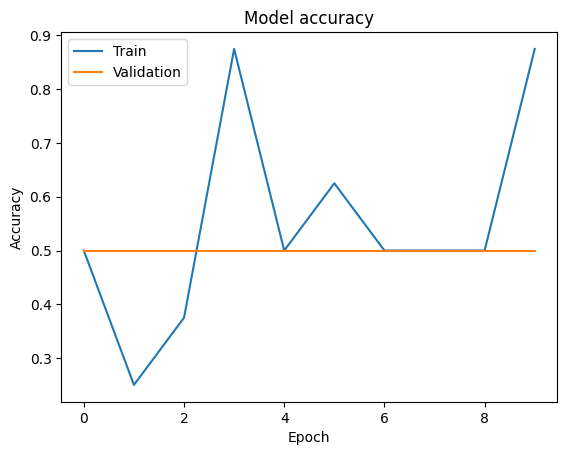

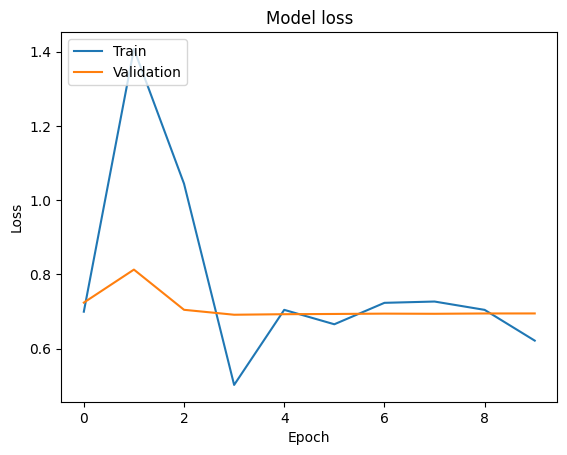

In [3]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define the directory where the dataset is located
data_dir = '/content/chest_xray_small/train'  # Assuming 'train' folder is present
train_dir = '/content/chest_xray_small/train_split'
val_dir = '/content/chest_xray_small/val_split'

# Create new directories for training and validation sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each class and split the dataset into train/val
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)

    if os.path.isdir(class_path):
        # Create subdirectories for train/val splits
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Get list of image files in the current class folder
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Split the data into training and validation sets (80% train, 20% validation)
        train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

        # Move the files to their respective directories
        for file in train_files:
            shutil.move(os.path.join(class_path, file), os.path.join(train_dir, class_name, file))

        for file in val_files:
            shutil.move(os.path.join(class_path, file), os.path.join(val_dir, class_name, file))

print("✅ Dataset split into train and validation sets.")

# Data preprocessing and augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data preprocessing
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification (e.g., Pneumonia vs. Healthy)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Build the CNN model
model = Sequential()

# Convolutional layers with activation functions and pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Save the model
model.save('cnn_chest_xray_model.h5')

# Optional: Plot training & validation accuracy and loss curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

TRAINING GAN MODEL

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0: [D loss: 1.0474, acc: 21.09] [G loss: 0.7748]
50: [D loss: 4.0881, acc: 4.62] [G loss: 0.0385]
100: [D loss: 4.6335, acc: 4.28] [G loss: 0.0196]
150: [D loss: 4.8481, acc: 4.06] [G loss: 0.0132]
200: [D loss: 4.9780, acc: 3.99] [G loss: 0.0099]
250: [D loss: 5.0762, acc: 4.03] [G loss: 0.0080]
300: [D loss: 5.1553, acc: 3.90] [G loss: 0.0067]
350: [D loss: 5.2205, acc: 3.88] [G loss: 0.0057]
400: [D loss: 5.2810, acc: 3.82] [G loss: 0.0050]
450: [D loss: 5.3356, acc: 3.76] [G loss: 0.0045]


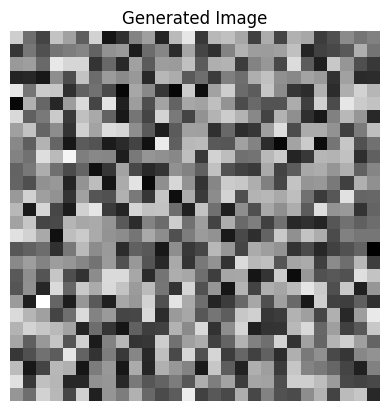

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, LeakyReLU
import matplotlib.pyplot as plt

# Parameters
latent_dim = 50
img_shape = (28, 28, 1)
batch_size = 32
epochs = 500  # small number for quick test

# Generator
def build_generator():
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(0.2),
        Dense(28 * 28, activation='tanh'),
        Reshape(img_shape)
    ])
    return model

# Discriminator
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=img_shape),
        Dense(128),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build & compile models
generator = build_generator()
discriminator = build_discriminator()

# Combined model
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Load & preprocess MNIST (small subset for speed)
(x_train, _), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train[:5000]  # only a small subset
x_train = (x_train - 127.5) / 127.5  # normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)

# Training loop
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise, verbose=0)

    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_y)

    # Print progress every 50 steps
    if epoch % 50 == 0:
        print(f"{epoch}: [D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")

# Generate a sample
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise, verbose=0)[0]

# Plot
plt.imshow(gen_img.squeeze(), cmap='gray')
plt.title("Generated Image")
plt.axis('off')
plt.show()
